# Task
Analyze the 'COVID clinical trials.csv' dataset by loading it into a pandas DataFrame, performing initial data inspection and cleaning, conducting exploratory data analysis on key categorical features like 'Phase', 'Status', and 'Location', and visualizing the distributions with bar charts. Additionally, execute a simple SQL query on the DataFrame and prepare the data for potential machine learning by performing one-hot encoding on a categorical feature. Finally, summarize the key insights and present the visualizations.

## Load Data

### Subtask:
Load the 'COVID clinical trials.csv' file into a pandas DataFrame for processing.


**Reasoning**:
To load the CSV file, I need to import the pandas library, then use its `read_csv` function to load the data into a DataFrame, and finally display the first 5 rows to verify the load.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/COVID clinical trials.csv')
df.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


## Initial Data Inspection and Cleaning

### Subtask:
Examine data types, identify missing values, and handle duplicates. Perform basic cleaning like converting columns to appropriate types.


**Reasoning**:
To begin the data inspection and cleaning process, I will first display the DataFrame's concise summary to understand its structure and data types, then calculate missing values, remove duplicates, and finally confirm the DataFrame's new shape.



In [ ]:
print("DataFrame Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nShape before dropping duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", df.shape)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded B

**Reasoning**:
Based on the `df.info()` output, several columns related to dates are currently stored as `object` (string) type. Converting these to `datetime` objects will enable proper time-series analysis and manipulation.



In [ ]:
date_columns = ['Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Results First Posted', 'Last Update Posted']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

print("Data types after converting date columns:")
df[date_columns].info()

Data types after converting date columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Start Date               5263 non-null   datetime64[ns]
 1   Primary Completion Date  4321 non-null   datetime64[ns]
 2   Completion Date          4258 non-null   datetime64[ns]
 3   First Posted             5783 non-null   datetime64[ns]
 4   Results First Posted     36 non-null     datetime64[ns]
 5   Last Update Posted       5783 non-null   datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 271.2 KB


**Reasoning**:
The 'Study Documents' column has over 96% missing values, rendering it largely uninformative for analysis. Dropping it is a sensible basic cleaning step to reduce noise and simplify the dataset.



In [ ]:
df.drop('Study Documents', axis=1, inplace=True)
print("Dropped 'Study Documents' column. New DataFrame shape:", df.shape)

Dropped 'Study Documents' column. New DataFrame shape: (5783, 26)


## Exploratory Data Analysis (EDA)

### Subtask:
Summarize key categorical features like 'Phases', 'Status', and 'Location'. Analyze the distribution of these variables.


**Reasoning**:
To analyze the distribution of the 'Phases' column, I will count the occurrences of each unique value and display them.



In [ ]:
print("Distribution of 'Phases':")
print(df['Phases'].value_counts())

Distribution of 'Phases':
Phases
Not Applicable     1354
Phase 2             685
Phase 3             450
Phase 1             234
Phase 2|Phase 3     200
Phase 1|Phase 2     192
Phase 4             161
Early Phase 1        46
Name: count, dtype: int64


**Reasoning**:
To analyze the distribution of the 'Status' column, I will count the occurrences of each unique value and display them.



In [ ]:
print("\nDistribution of 'Status':")
print(df['Status'].value_counts())


Distribution of 'Status':
Status
Recruiting                   2805
Completed                    1025
Not yet recruiting           1004
Active, not recruiting        526
Enrolling by invitation       181
Withdrawn                     107
Terminated                     74
Suspended                      27
Available                      19
No longer available            12
Approved for marketing          2
Temporarily not available       1
Name: count, dtype: int64


**Reasoning**:
To extract the country from the 'Locations' column, I will split the string by commas and take the last element, assuming it represents the country. This will create a new 'Country' column.



In [ ]:
df['Country'] = df['Locations'].astype(str).apply(lambda x: x.split(',')[-1].strip() if pd.notna(x) else None)
print("Extracted 'Country' column. First 5 rows of 'Locations' and 'Country' column:")
print(df[['Locations', 'Country']].head())

Extracted 'Country' column. First 5 rows of 'Locations' and 'Country' column:
                                           Locations     Country
0  Groupe Hospitalier Paris Saint-Joseph, Paris, ...      France
1       Cimedical, Barranquilla, Atlantico, Colombia    Colombia
2  Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...  San Marino
3  Hong Kong Sanatorium & Hospital, Hong Kong, Ho...   Hong Kong
4                       CHR Orléans, Orléans, France      France


**Reasoning**:
To analyze the distribution of the newly created 'Country' column, I will count the occurrences of each unique country and display the top 10.



In [ ]:
print("
Top 10 Countries by Study Count:")
print(df['Country'].value_counts().head(10))

SyntaxError: unterminated string literal (detected at line 1) (ipython-input-1662108738.py, line 1)

**Reasoning**:
The previous code block failed due to an unterminated string literal in the print statement. I will fix the string formatting to ensure the string is correctly terminated.



In [ ]:
print("Top 10 Countries by Study Count:")
print(df['Country'].value_counts().head(10))

Top 10 Countries by Study Count:
Country
United States     1267
France             647
nan                585
United Kingdom     306
Italy              235
Spain              234
Turkey             219
Canada             202
Egypt              192
China              171
Name: count, dtype: int64


## Visualize Key Findings

### Subtask:
Create visualizations such as bar charts to illustrate the distribution of trial phases, study statuses, and top participating countries. Ensure legends are provided.


**Reasoning**:
To visualize the distributions of 'Phases', 'Status', and 'Country', I will import the necessary plotting libraries and then create bar charts for each, adding titles and labels for clarity.



/tmp/ipython-input-510725281.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Phases', order=df['Phases'].value_counts().index, palette='viridis')


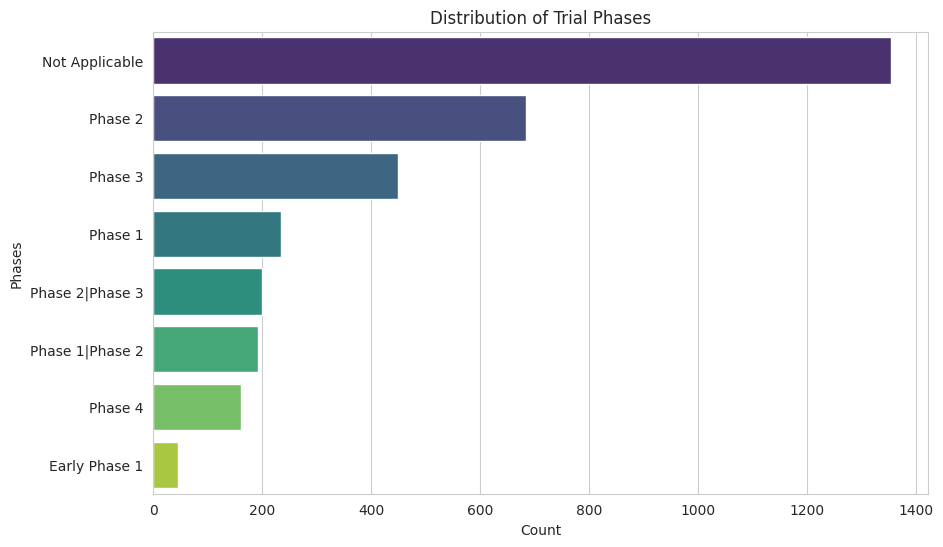

/tmp/ipython-input-510725281.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Status', order=df['Status'].value_counts().index, palette='magma')


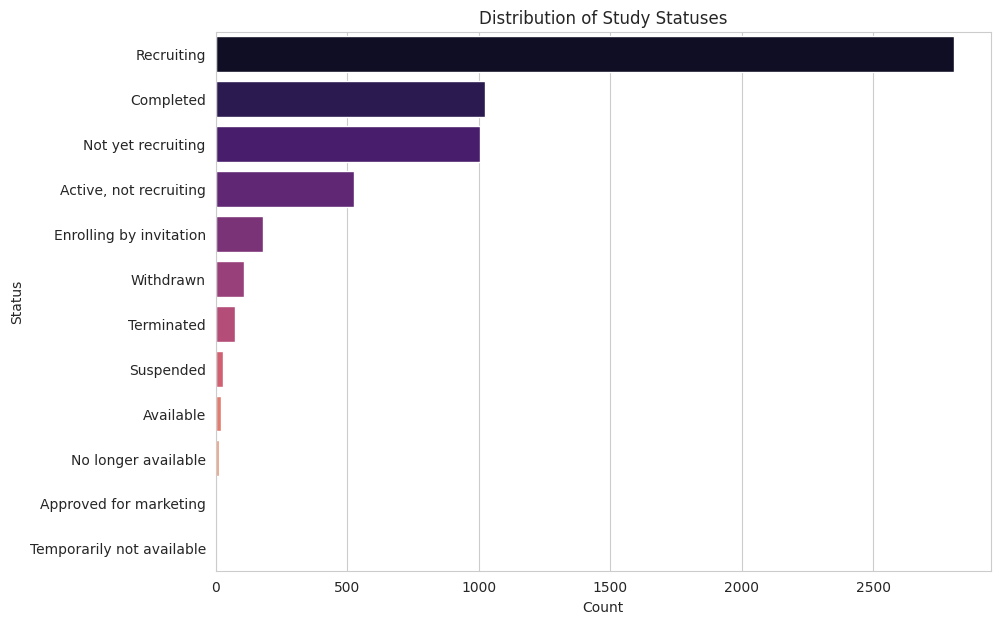

/tmp/ipython-input-510725281.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='cividis')


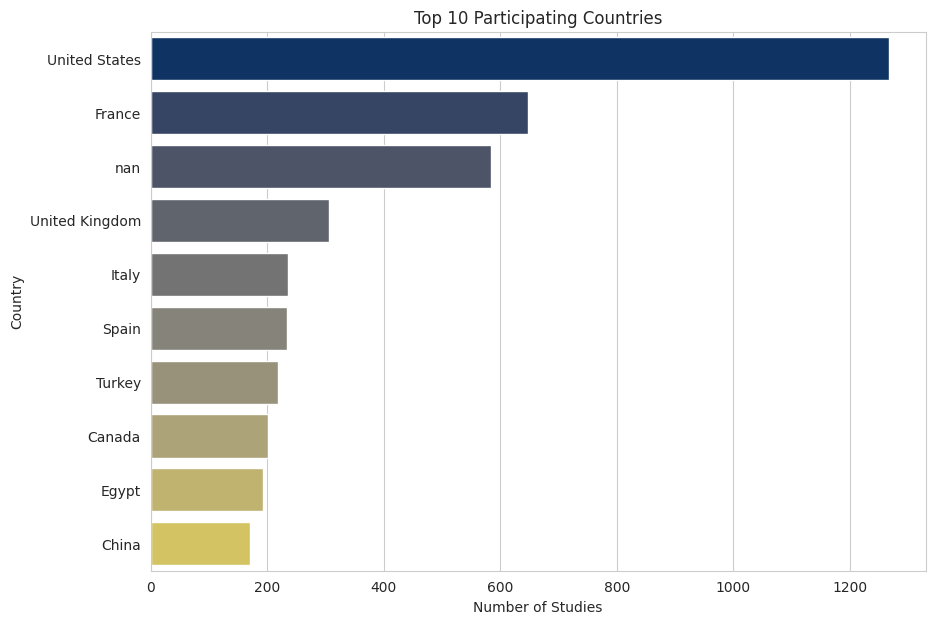

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

# 1. Bar chart for 'Phases' distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Phases', order=df['Phases'].value_counts().index, palette='viridis')
plt.title('Distribution of Trial Phases')
plt.xlabel('Count')
plt.ylabel('Phases')
plt.show()

# 2. Bar chart for 'Status' distribution
plt.figure(figsize=(10, 7))
sns.countplot(data=df, y='Status', order=df['Status'].value_counts().index, palette='magma')
plt.title('Distribution of Study Statuses')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()

# 3. Bar chart for top 10 'Country' distributions
plt.figure(figsize=(10, 7))
top_10_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='cividis')
plt.title('Top 10 Participating Countries')
plt.xlabel('Number of Studies')
plt.ylabel('Country')
plt.show()

**Reasoning**:
The previous code generated `FutureWarning` messages from Seaborn because the `palette` argument was used without explicitly specifying the `hue` parameter. To address this and prevent future warnings, I will modify the `sns.countplot` and `sns.barplot` calls to include the `hue` parameter, setting it to the variable being plotted, and also set `legend=False` as suggested by the warning.



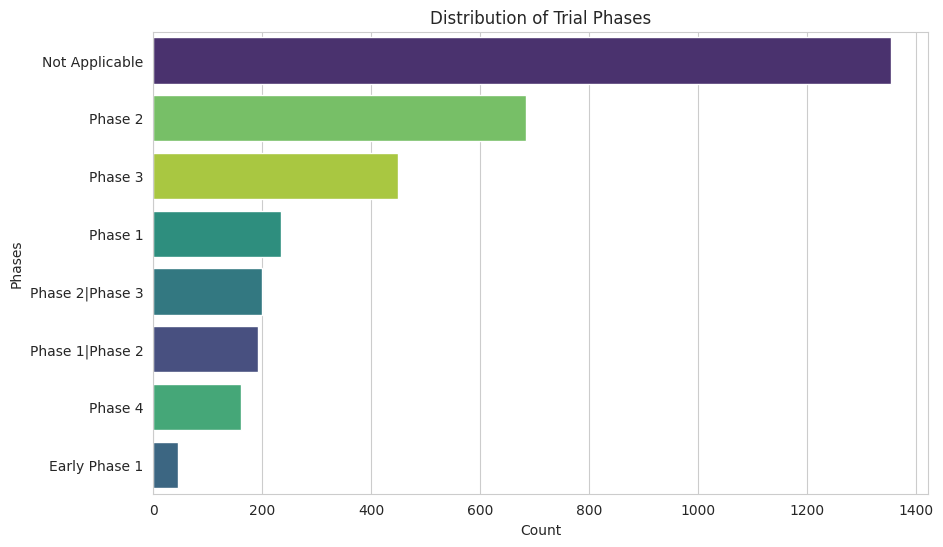

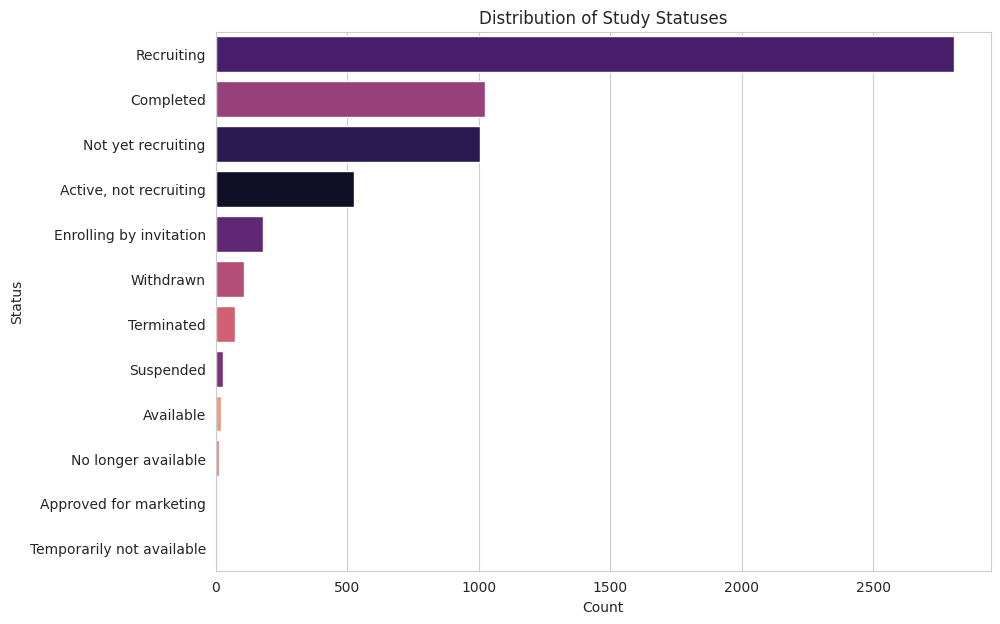

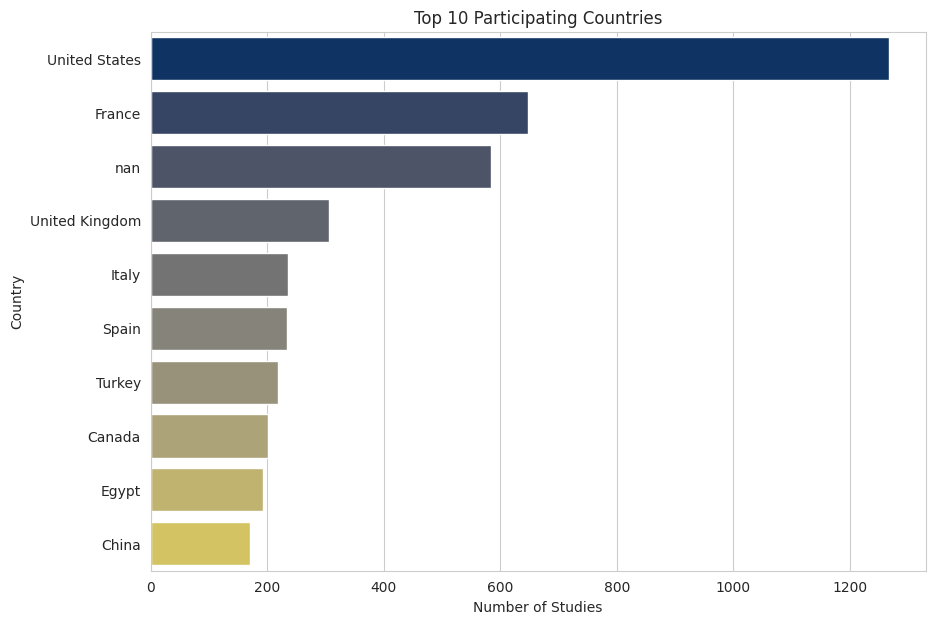

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

# 1. Bar chart for 'Phases' distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Phases', order=df['Phases'].value_counts().index, palette='viridis', hue='Phases', legend=False)
plt.title('Distribution of Trial Phases')
plt.xlabel('Count')
plt.ylabel('Phases')
plt.show()

# 2. Bar chart for 'Status' distribution
plt.figure(figsize=(10, 7))
sns.countplot(data=df, y='Status', order=df['Status'].value_counts().index, palette='magma', hue='Status', legend=False)
plt.title('Distribution of Study Statuses')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()

# 3. Bar chart for top 10 'Country' distributions
plt.figure(figsize=(10, 7))
top_10_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='cividis', hue=top_10_countries.index, legend=False)
plt.title('Top 10 Participating Countries')
plt.xlabel('Number of Studies')
plt.ylabel('Country')
plt.show()

## SQL Query Example

### Subtask:
Execute a simple SQL query on the DataFrame to filter or aggregate data, demonstrating SQL capabilities within Python.


**Reasoning**:
To execute SQL queries directly on a pandas DataFrame, the `pandasql` library is required. This step installs the library so it can be used in subsequent code blocks.



In [ ]:
pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=d485ab550b6fcdb37303ba798ac74c19e23d4a0e01b6445f54c2c149422ded1d
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql


**Reasoning**:
With `pandasql` installed, I will now import the `sqldf` function, define an SQL query to select 'NCT Number', 'Title', and 'Status' for studies with 'Recruiting' status, execute it on the DataFrame, and display the first few rows of the result to verify the query.



In [ ]:
from pandasql import sqldf

# Define the SQL query
query = """SELECT "NCT Number", Title, Status FROM df WHERE Status = 'Recruiting' LIMIT 10"""

# Execute the SQL query
recruiting_studies = sqldf(query, globals())

# Display the first few rows of the result
print("Studies with 'Recruiting' status (first 10 rows):")
print(recruiting_studies.head())

Studies with 'Recruiting' status (first 10 rows):
    NCT Number                                              Title      Status
0  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...  Recruiting
1  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2  Recruiting
2  NCT04384588  COVID19-Convalescent Plasma for Treating Patie...  Recruiting
3  NCT04355897  CoVID-19 Plasma in Treatment of COVID-19 Patients  Recruiting
4  NCT04412265          Frailty in Elderly Patients With COVID-19  Recruiting


## Data Preparation for ML (Hint)

### Subtask:
Perform one-hot encoding on a categorical feature, as a preliminary step for potential machine learning applications.


**Reasoning**:
To prepare the data for machine learning, I will perform one-hot encoding on the 'Phases' column. This involves creating new binary columns for each category and then concatenating them with the original DataFrame while dropping the initial 'Phases' column to avoid multicollinearity. Finally, I will display the new DataFrame's shape and its first few rows to verify the encoding.



In [ ]:
df_encoded = df.copy()

# Perform one-hot encoding on the 'Phases' column
phases_encoded = pd.get_dummies(df_encoded['Phases'], prefix='Phases', drop_first=True)

# Concatenate the one-hot encoded columns with the original DataFrame and drop the original 'Phases' column
df_encoded = pd.concat([df_encoded, phases_encoded], axis=1)
df_encoded.drop('Phases', axis=1, inplace=True)

print("Shape of DataFrame after one-hot encoding 'Phases':", df_encoded.shape)
print("\nFirst 5 rows with new one-hot encoded 'Phases' columns:")
print(df_encoded[[col for col in df_encoded.columns if 'Phases_' in col]].head())

Shape of DataFrame after one-hot encoding 'Phases': (5783, 33)

First 5 rows with new one-hot encoded 'Phases' columns:
   Phases_Not Applicable  Phases_Phase 1  Phases_Phase 1|Phase 2  \
0                   True           False                   False   
1                  False           False                    True   
2                  False           False                   False   
3                  False           False                   False   
4                  False           False                   False   

   Phases_Phase 2  Phases_Phase 2|Phase 3  Phases_Phase 3  Phases_Phase 4  
0           False                   False           False           False  
1           False                   False           False           False  
2           False                   False           False           False  
3           False                   False           False           False  
4           False                   False           False           False  


## Final Task

### Subtask:
Summarize the key insights found during the analysis and present the visualizations.


## Summary:

### Data Analysis Key Findings
*   The dataset initially contained 5783 rows and 27 columns.
*   Several columns had a high percentage of missing values, notably 'Results First Posted' (approximately 99%), 'Study Documents' (approximately 97%), 'Acronym' (approximately 57%), and 'Phases' (approximately 43%).
*   No duplicate rows were found in the dataset.
*   Date-related columns were successfully converted to datetime objects, although some invalid date entries resulted in `NaT` values.
*   The 'Study Documents' column was removed due to its overwhelming proportion of missing data.
*   **Distribution of Trial Phases:** 'Not Applicable' was the most common phase with 1354 entries, followed by 'Phase 2' (685 entries) and 'Phase 3' (450 entries).
*   **Distribution of Study Statuses:** 'Recruiting' was the predominant status, accounting for 2805 studies, followed by 'Completed' (1025 entries) and 'Not yet recruiting' (1004 entries).
*   **Top Participating Countries:** The 'United States' led with 1267 studies, followed by 'France' with 647 studies, after extracting country information from the 'Locations' column.
*   Visualizations (bar charts) were successfully generated to illustrate the distributions of trial phases, study statuses, and top participating countries.
*   A SQL-like query using `pandasql` successfully extracted studies with a 'Recruiting' status.
*   The 'Phases' column was one-hot encoded for machine learning preparation, increasing the DataFrame's column count from 26 to 33.

### Insights or Next Steps
*   The dataset shows a strong focus on recruitment for COVID-19 clinical trials, with a significant number of studies either recruiting or completed. The high proportion of 'Not Applicable' phases might indicate studies that are observational or not drug-related, warranting further investigation into their nature.
*   **Next Steps:** Further analysis could involve exploring the 'Conditions' and 'Interventions' to understand the types of COVID-19 treatments and preventative measures being studied. Additionally, a deeper dive into the missing data in other key columns like 'Phases' and 'Acronym' could help determine if imputation or further data engineering is required before advanced modeling.
